# Исследование рынка общественного питания Москвы

### Цели и задачи проекта

**Цель** — изучить рынок общественного питания Москвы и дать рекомендации о выборе концепции и оптимального местоположения нового заведения общественного питания в Москве.

**Задачи**: 
- Провести сравнительный анализ заведений разных категорий; 
- Определить факторы, влияющие на рейтинг заведения;
- Выделить наиболее популярные сети заведений и определить их рейтинг;
- Выяснить, как средний чек заведения зависит от района его расположения и удаленности от центра.

### Описание данных

Для анализа поступили данные о заведениях общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:
- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` — информация о среднем чеке в заведениях общественного питания.

#### Описание датасета `rest_info.csv`
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

#### Описание датасета `rest_price.csv`
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
       и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

---

## 1. Загрузка данных и знакомство с ними

- Загрузим данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеку для работы со строками
import string

In [2]:
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv`

In [3]:
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
rest_info_df.describe()

,rating,chain,seats
count,8406.000000,8406.000000,4795.000000
mean,4.229895,0.381275,108.421689
std,0.470348,0.485729,122.833396
min,1.000000,0.000000,0.000000
25%,4.100000,0.000000,40.000000
50%,4.300000,0.000000,75.000000
75%,4.400000,1.000000,140.000000
max,5.000000,1.000000,1288.000000


---

Теперь познакомимся с данными датасета `rest_price.csv`

In [6]:
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [8]:
rest_price_df.describe()

,middle_avg_bill,middle_coffee_cup
count,3149.000000,535.000000
mean,958.053668,174.721495
std,1009.732845,88.951103
min,0.000000,60.000000
25%,375.000000,124.500000
50%,750.000000,169.000000
75%,1250.000000,225.000000
max,35000.000000,1568.000000


---

### Промежуточный вывод

**После первичного анализа данных можно сделать следующие выводы:**

**Датасет `rest_info.csv`** содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.
- В столбцах `hours` и `seats` содержатся пропущенные значения. Это требует дальнейшего анализа.
- Данные содержат 2 столбца типа `float64`: `rating`, `seats`; 1 столбец типа `int64`: `chain`, 6 столбцов типа `object`: `id`, `name`, `category`, `address`, `district`, `hours`. 
- В соответствии с содержанием данных следует провести преобразования типов данных следующих столбцов: столбцы `category` и `discrict` перевести в тип category, `chain` — в bool, `seats` — в int64, а также оптимизировать размерность столбца `rating`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Интерес вызывают данные в столбце `seats` — наблюдаются высокие значения стандартного отклонения, значительная разница между значениями среднего и медианы и нереалистично высокое максимальное значение. Все это указывает на то, что столбец `seats` требует проведения дополнительного анализа.

**Датасет `rest_price.csv`** содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания Москвы.
- В столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` содержатся пропущенные значения. Это требует дальнейшего анализа.
- Данные содержат 2 столбца типа `float64`: `middle_avg_bill`, `middle_coffee_cup`; 3 столбца типа `object`: `id`, `price`, `avg_bill`. 
- В соответствии с содержанием данных следует поменять тип данных столбца `price` на `category`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Интерес вызывают данные в столбце `middle_avg_bill` — наблюдаются высокие значения стандартного отклонения, значительная разница между значениями среднего и медианы и нулевое минимальное значение. Все это указывает на то, что столбец `middle_avg_bill` требует проведения дополнительного анализа.

Помимо этого, стоит также обратить внимание на значительные расхождения в количестве строк в этих датасетах — требуется изучение датасета `rest_info.csv` на предмет дубликатов.

### Подготовка единого датафрейма

Объединим данные двух датасетов в один

In [9]:
# Соединяем данные в единый датафрейм df
df = rest_info_df.merge(rest_price_df, how = 'left', on = 'id')

In [10]:
df_rows_count = df.shape[0]

In [11]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех заведениях сохранилась.

---

## 2. Предобработка данных
Подготовим данные к исследовательскому анализу

In [12]:
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
temp = df.copy() 
len(temp)

8406

### Типы данных
Как уже отмечалось выше, следует провести преобразования типов данных следующих столбцов: столбцы `category`, `district` и `price` перевести в тип category, `chain` — в bool, а также оптимизировать размерность числовых данных `rating`.

In [13]:
df[['category', 'district', 'price']] = df[['category', 'district', 'price']].astype('category')
df['chain'] = df['chain'].astype('bool')

In [14]:
for column in ['middle_avg_bill','middle_coffee_cup','seats', 'rating']:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   category
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float32 
 7   chain              8406 non-null   bool    
 8   seats              4795 non-null   float32 
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float32 
 12  middle_coffee_cup  535 non-null    float32 
dtypes: bool(1), category(3), float32(4), object(5)
memory usage: 559.1+ KB


### Пропущенные значения

In [16]:
# Посчитаем кол-во и долю пропусков в каждом столбце 
tmp = df.copy() # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
hours,536,0.063800
seats,3611,0.429600
price,5091,0.605600
avg_bill,4590,0.546000
middle_avg_bill,5257,0.625400
middle_coffee_cup,7871,0.936400


**Пропущенные значения обнаружены в следующих столбцах:**
- `hours` — в 536 (6% данных) строках отсутствует информация о днях и часах работы.
- `seats` — в 3611 (43% данных) строках отсутствует информация о количестве посадочных мест.
- `price` — в 5091 (61% данных) строках отсутствует информация о категории цен в заведении.
- `avg_bill` — в 4590 (55% данных) строках отсутствует информация о средней стоимости заказа.
- `middle_avg_bill` — в 5257 (63% данных) строках отсутствует информация о среднем чеке.
- `middle_coffee_cup` — в 7871 (94% данных) строках отсутствует информация о цене одной чашки капучино.

**Возможные причины появления пропусков:**
- Наличие пропусков в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, вероятно, связано с отсутствием такой информации по некоторым заведениям в источнике данных — сервисах Яндекс Карты и Яндекс Бизнес. 
- Пропуски в столбце `middle_coffee_cup` могут быть связаны как с отсутствием данных, так и с отсутствием в меню капучино, информацию о цене которого несет этот столбец.

**Работа с пропусками:**
- Пропущенные значения в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` можно оставить без изменений.

### Дубликаты

**Изучим данные на предмет явных дубликатов**

In [17]:
# Сортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=df.columns.tolist())

# Находим дубликаты
duplicates = df_sorted[df_sorted.duplicated(keep=False)]

# Выводим дубликаты
print(duplicates)

Empty DataFrame
Columns: [id, name, category, address, district, hours, rating, chain, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup]
Index: []


В данных нет явных дубликатов.

**Изучим данные на предмет неявных дубликатов**

- Для начала проверим уникальные значения в категориальных переменных `category`, `district` и `price`, чтобы убедиться, что в данных нет значений, написанных по-разному, но имеющих один и тот же смысл. 

In [18]:
for column in ['category', 'district', 'price']:
    print(f'{column}: {df[column].unique()}')
    print()

category: ['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Categories (8, object): ['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']

district: ['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']
Categories (9, object): ['Восточный административный округ', 'Западный административный округ', 'Северный административный округ', 'Северо-Восточный административный округ', ..., 'Центральный административный округ', 'Юго-Восточный административный округ', 'Юго-Западный административный округ', 'Южный административный округ']

price: [NaN, 'выше среднего', 'средние', 'высокие', 'низкие']
Categories (4, object): ['в

Дубликатов в столбцах `category`, `district` и `price` нет, значения в них не требуют какой-либо обработки.

- Неявными дубликатами будут считаться заведения с одинаковыми названиями и одинаковым адресом. Однако названия могут быть написаны по-разному. Чтобы это исправить, нужно их оптимизировать — привести к нижнему регистру и удалить знаки препинания.

In [19]:
# Удалим в столбцах name и address пунктуацию и лишние пробелы, приведем к нижнему регистру
# Создадим два новых столбца, чтобы не менять значения в исходных столбцах
df['name_norm'] = df['name'].str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))
df['address_norm'] = df['address'].str.lower().str.strip().str.translate(str.maketrans('', '', string.punctuation))

Посмотрим на получившиеся данные — появились ли строки с одинаковыми названиями и адресом

In [20]:
df = df.drop_duplicates()
df[df.duplicated(subset=['name_norm', 'address_norm'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,name_norm,address_norm
189,072032ce16dc47bfbc63b672c75bd371,Кафе,кафе,"Москва, парк Ангарские Пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,False,NaN,NaN,NaN,NaN,NaN,кафе,москва парк ангарские пруды
215,897ddbc6746c4388b19dc8a9fcdbb488,Кафе,кафе,"Москва, парк Ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,False,NaN,NaN,NaN,NaN,NaN,кафе,москва парк ангарские пруды
599,be007021c2a44e2f9488f7b3174d1a2b,В парке вкуснее!,кафе,"Москва, Северный административный округ, район...",Северный административный округ,"ежедневно, 10:00–21:00",2.2,False,NaN,NaN,NaN,NaN,NaN,в парке вкуснее,москва северный административный округ район л...
600,82ea6220bb4e4ffe83bfdf1dd7b4d556,В парке вкуснее,кофейня,"Москва, Северный административный округ, район...",Северный административный округ,"ежедневно, 10:00–21:00",2.2,True,NaN,NaN,NaN,NaN,NaN,в парке вкуснее,москва северный административный округ район л...
1430,62608690e9cc464fbcd980cfd552e334,More poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,False,188.0,NaN,NaN,NaN,NaN,more poke,москва волоколамское шоссе 11 стр 2
1511,a69f018d5c064873a3b491b0121bc1b4,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188.0,NaN,NaN,NaN,NaN,more poke,москва волоколамское шоссе 11 стр 2
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,Раковарня Клешни и Хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,False,150.0,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,москва проспект мира 118
2420,aba1de7ad7d64ac0a3f8684bda29d905,Раковарня Клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150.0,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,москва проспект мира 118
3091,3c2a73ea79a04be48858fab3685f2f37,Хлеб да Выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,True,276.0,NaN,NaN,NaN,NaN,хлеб да выпечка,москва ярцевская улица 19
3109,d3116844e4e048f99614eb30be3214e0,Хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,False,276.0,NaN,NaN,NaN,NaN,хлеб да выпечка,москва ярцевская улица 19


Действительно, обнаружилось 5 неявных дубликатов, которые необходимо удалить.

In [21]:
# Удалим повторяющиеся строки в датафрейме
df = df.drop_duplicates(subset=['name_norm', 'address_norm'])

# Удалим вспомогательные столбцы name_norm и address_norm
df = df.drop(['name_norm', 'address_norm'], axis = 1)

**Расчет удаленных значений**

In [22]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8401 
 Удалено строк в датасете после обработки 5 
 Процент потерь 0.06


In [23]:
# Кол-во строк в датафрейме после преобразований
df_rows_count_result = df.shape[0]
# Количество удаленных строк
deleted_rows = df_rows_count - df_rows_count_result
# Доля удаленных строк от исходного кол-ва строк в датафрейме
deleted_rows_share = round(deleted_rows/df_rows_count, 4)*100

print(" Было строк в исходном датасете:", len(temp),
      '\n', "Осталось строк в датасете после обработки:", df_rows_count_result,
      '\n', "Удалено строк в датасете после обработки:", deleted_rows,
      '\n', "Процент потерь:", deleted_rows_share)

 Было строк в исходном датасете: 8406 
 Осталось строк в датасете после обработки: 8401 
 Удалено строк в датасете после обработки: 5 
 Процент потерь: 0.06


Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
- логическое значение `True` — если заведение работает ежедневно и круглосуточно;
- логическое значение `False` — в противоположном случае.

In [24]:
# Создадим функцию для созданию новой переменной и заполнения ее значениями:
def create_is_24_7(row):
    if row == 'ежедневно, круглосуточно':
        return True
    return False

# Создаём столбец is_24_7 с помощью функции create_is_24_7
df['is_24_7'] = df['hours'].apply(create_is_24_7)

In [25]:
# Посмотрим сколько заведений в каждой категории
df['is_24_7'].value_counts()

False    7671
True      730
Name: is_24_7, dtype: int64

---

### Промежуточный вывод

В процессе предобработки данных были проведены следующие преобразования:
- Объединены данные двух датасетов `rest_info_df.csv` и `rest_price_df.csv` в один датафрейм `df`;
- Удалено 5 строк с одинаковыми заведениями (неявные дубликаты);
- Изменены типы данных переменных `category`, `district` и `price` (в category), `chain` (в bool);
- Оптимизирована размерность числовых столбцов.

Всего было удалено 5 строк, что составляет 0.06% от всего объема исходных данных.

---

## 3. Исследовательский анализ данных

### Категории заведений
Изучим, какие категории заведений представлены в данных.

In [26]:
# Изучим распределение данных по категориям
display(df['category'].value_counts())
round(df['category'].value_counts(normalize=True)*100, 2)

кафе               2376
ресторан           2042
кофейня            1412
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

кафе               28.28
ресторан           24.31
кофейня            16.81
бар,паб             9.09
пиццерия            7.53
быстрое питание     7.18
столовая            3.75
булочная            3.05
Name: category, dtype: float64

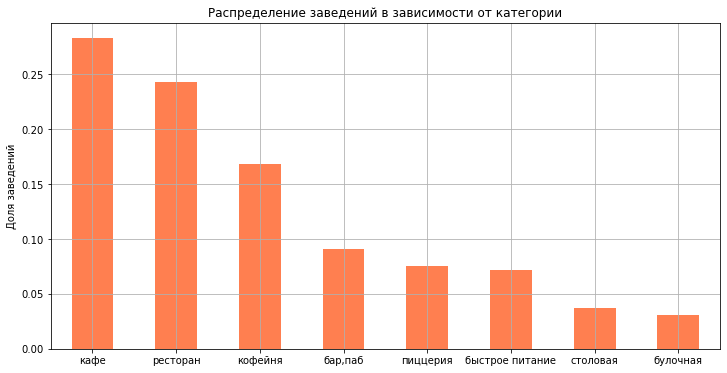

In [27]:
# Построим столбчатую диаграмму по столбцу category
plt.figure(figsize = (12,6))

df['category'].value_counts(normalize=True).plot(
                kind = 'bar',
                rot = 0,
                legend = False,
                title = 'Распределение заведений в зависимости от категории',
                color = 'coral',
                ylabel = 'Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В данных представлены восемь категорий заведений. Более половины (53%) всех заведений приходится на кафе (28%) и рестораны (24%). Немного меньше — кофеен (17%). Наименее популярными являются бары, пабы (9%), пиццерии (8%), заведения быстрого питания (7%), а также столовые (4%) и булочные (3%).

---

### Административные районы Москвы

Изучим распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [28]:
# Изучим распределение данных по административным районам Москвы
display(df['district'].value_counts())
round(df['district'].value_counts(normalize=True)*100, 2)

Центральный административный округ         2242
Северный административный округ             897
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Центральный административный округ         26.69
Северный административный округ            10.68
Южный административный округ               10.62
Северо-Восточный административный округ    10.59
Западный административный округ            10.12
Восточный административный округ            9.50
Юго-Восточный административный округ        8.50
Юго-Западный административный округ         8.44
Северо-Западный административный округ      4.87
Name: district, dtype: float64

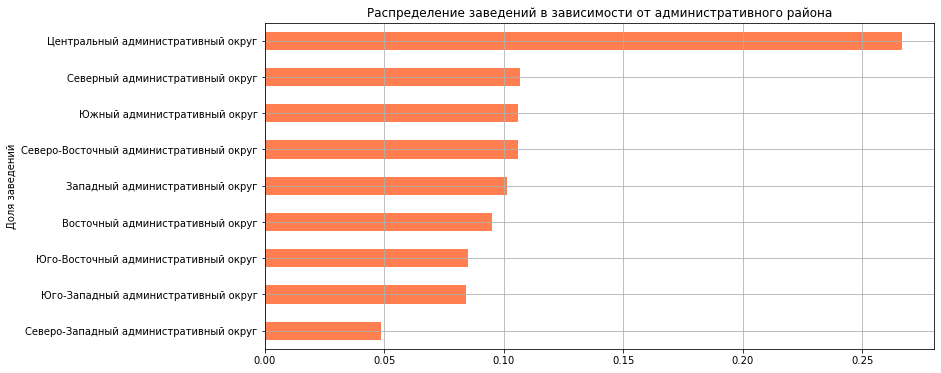

In [29]:
# Построим линейчатую диаграмму по столбцу district
plt.figure(figsize = (12,6))

df['district'].value_counts(normalize=True).sort_values().plot(
                kind = 'barh',
                legend = False,
                title = 'Распределение заведений в зависимости от административного района',
                color = 'coral',
                ylabel = 'Административный район',
                xlabel = 'Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В датасете представлены данные по девяти административным районам.  

Больше всего заведений расположено в Центральном административном округе — 2242, что составляет 27% от количества всех заведений общественного питания Москвы.

Это число практически в 3 раза превышает долю заведений в остальных районах (Северный, Северо-Восточный, Южный, Западный, Восточный, Юго-Западный, Юго-Восточный), где этот показатель составляет от 8% до 11%.  

Район с наименьшим количеством заведений общественного питания — Северо-Западный, где сосредоточено всего 5% заведений общественного питания Москвы.

In [30]:
# Изучим распределение данных по категориям в Центральном административном округе
display(df[df['district'] == 'Центральный административный округ']['category'].value_counts())
round(df[df['district'] == 'Центральный административный округ']['category'].value_counts(normalize=True)*100, 2)

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

ресторан           29.88
кафе               20.70
кофейня            19.09
бар,паб            16.24
пиццерия            5.04
быстрое питание     3.88
столовая            2.94
булочная            2.23
Name: category, dtype: float64

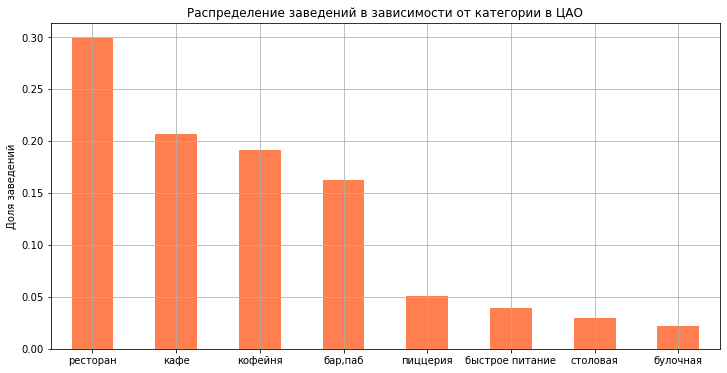

In [31]:
# Построим столбчатую диаграмму по столбцу category для данных по ЦАО
plt.figure(figsize = (12,6))

df[df['district'] == 'Центральный административный округ']['category'].value_counts(normalize=True).plot(
                kind = 'bar',
                legend = False,
                rot = 0,
                title = 'Распределение заведений в зависимости от категории в ЦАО',
                color = 'coral',
                xlabel = '',
                ylabel = 'Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Аналогично данным по всей Москве, половина заведений — это рестораны или кафе. Однако в центре доля ресторанов на 2% больше (30%), а доля кафе на 3% меньше (21%). Также в ЦАО практически в два раза больше баров, пабов, чем в среднем по городу (16% против 9%). Также в центре сосредоточено меньше заведений, которые можно отнести к бюджетному сегменту: пиццерий, заведений быстрого питания, столовых, булочных.

В целом, преобладание в Центральном округе Москвы заведений общественного питания отражает особый характер этого района как центра культурной, гастрономической и туристической жизни города. Популярность ресторанов объясняется сосредоточением в этом районе города туристов и обеспеченных жителей, а также высокой арендной ставкой, что делает нерентабельным содержание заведений более дешевых форматов. Более высокая концентрация баров и пабов в центре также объясняется активной ночной жизнью и туристической и развлекательной привлекательностью центра. В других районах города существует запрос на доступное питание местных жителей.

Также внимание привлекает малое количество заведений общественного питания в Северо-Западном административном округе (в два раза меньше, чем в других спальных районах Москвы). Это может быть связано как с малой численностью населения в этом районе, так и со слабым развитием инфраструктуры или низким спросом на такие заведения. Изучение причин этого требует отдельного анализа.

---

### Соотношение сетевых и несетевых заведений

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

In [32]:
# Изучим соотношение сетевых и несетевых заведений по всем данным
display(df['chain'].value_counts())
round(df['chain'].value_counts(normalize = True)*100, 2)

False    5199
True     3202
Name: chain, dtype: int64

False    61.89
True     38.11
Name: chain, dtype: float64

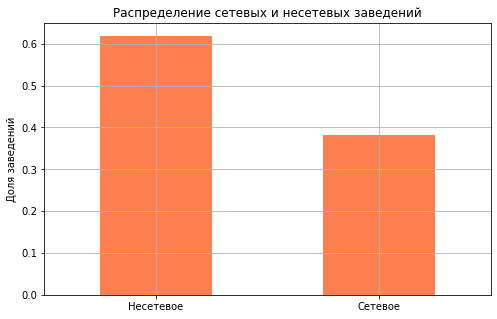

In [33]:
chain_counts = df['chain'].value_counts(normalize=True)
chain_counts.index = ['Несетевое', 'Сетевое']

# Построим столбчатую диаграмму по столбцу chain
chain_counts.plot(
                kind = 'bar',
                rot = 0,
                legend = False,
                title = 'Распределение сетевых и несетевых заведений',
                figsize = (8, 5),
                color = 'coral',
                xlabel = '',
                ylabel = 'Доля заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [34]:
# Изучим соотношение сетевых и несетевых заведений в разрезе категорий заведений
display(df.groupby('category')['chain'].value_counts().unstack(fill_value=0))
display()
display(round(df.groupby('category')['chain'].value_counts(normalize = True)*100, 2).unstack(fill_value=0))

chain,False,True
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,719
пиццерия,303,330
ресторан,1313,729
столовая,227,88


chain,False,True
category,,
"бар,паб",78.01,21.99
булочная,38.67,61.33
быстрое питание,61.53,38.47
кафе,67.21,32.79
кофейня,49.08,50.92
пиццерия,47.87,52.13
ресторан,64.30,35.70
столовая,72.06,27.94


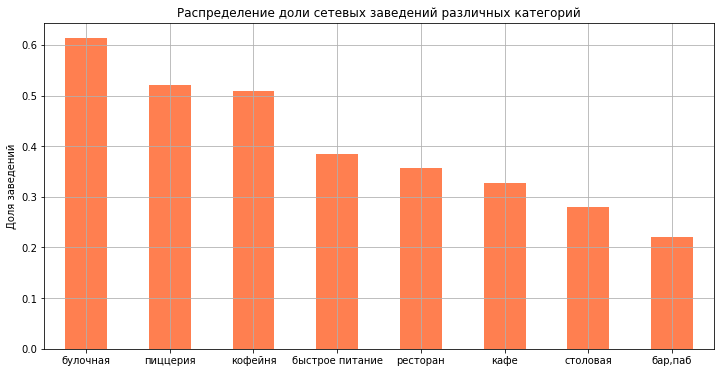

In [35]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts(normalize = True).unstack(fill_value=0)

grouped[True].sort_values(ascending = False).plot(
               kind='bar',
               title='Распределение доли сетевых заведений различных категорий',
               ylabel='Доля заведений',
               xlabel='',
               rot=0,
               figsize=(12, 6),
               color = 'coral')
plt.grid()

# Выводим график
plt.show()

В Москве преобладают несетевые заведения — их доля составляет 61% против 39% сетевых. Однако распределение существенно варьируется по разным категориям.  
- Булочные — единственная категория с преобладанием сетевого формата (62% против 38% несетвых).
- Кофейни и пиццерии имеют сбалансированное распределение — около 50/50%.
- Бары и столовые демонстрируют наибольшую долю уникальных заведений (79% и 72% соответственно).
- В категориях кафе и ресторанов сохраняется общий тренд с преобладанием несетевых заведений (64-65% против 35-36%).

---

### Количество посадочных мест в заведениях

Исследуем количество посадочных мест в заведениях.

In [36]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361435
std       122.841225
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

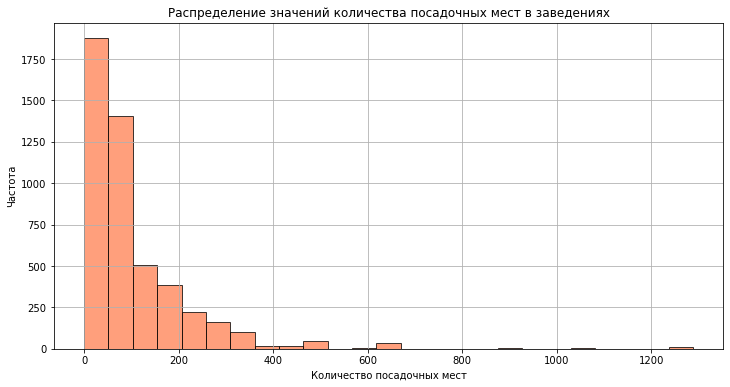

In [37]:
# Построим гистограмму распределения значений и диаграмму размаха для столбца seats
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
                color = 'coral'
)

# Настраиваем оформление графика
plt.title('Распределение значений количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

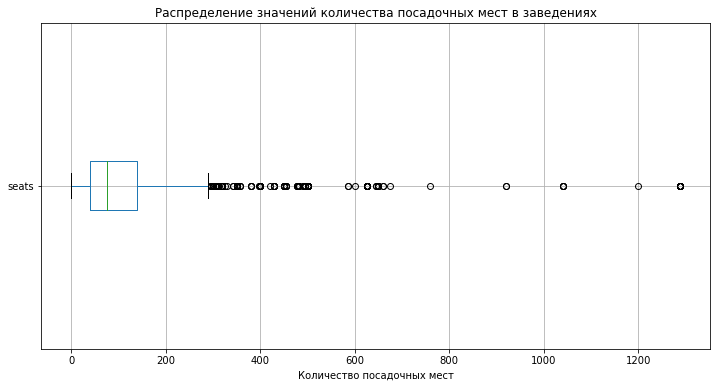

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

По гистограмме и боксплоту видно, что паспределение значений асимметричное, скошенное вправо. Это демонстрирует и значительная разница между медианой (75) и средним (108). Также высокое значение стандартного отклонения указывает на большой разброс значений.

Минимальное значение — 0, что корректно, поскольку существуют заведения работающие «на вынос» или на доставку.  

Максимальное значение — 1288, что не выглядит правдоподобным, особенно учитывая значение 75 перцентиля — 140. Согласно гистограмме размаха, основная часть данных сосредоточена между 40 и 140, а значения после ~250 являются выбросами. Также встречаются аномально высокие значения после 900.

Наличие заведений с количеством мест от 250 до 500 может быть связано с особенностями формата — например, это могут быть банкетные залы, фудкорты в торговых центрах или другие объекты, рассчитанные на массовое обслуживание. Также возможны технические особенности работы платформ «Яндекс Бизнес» и «Яндекс Карты»: при отсутствии точных данных от владельцев заведений сервисы могли автоматически подставлять усреднённые или максимальные значения. Это наиболее вероятно для заведений с числом мест от 920 до 1288, поскольку видно, что в этих диапазонах указаны только 4 конкретных числа.

**Определим для каждой категории заведений наиболее типичное количество посадочных мест** 

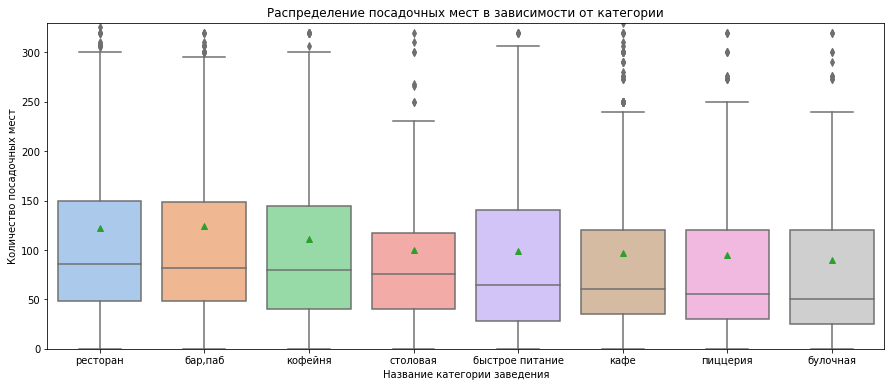

In [39]:
tmp = df.copy()  # Создаем копию датасета, чтобы не работать с исходным

# Создаем список категорий, сортированный по медианам
order=tmp.groupby('category')['seats'].median().sort_values(ascending=False).index 

# Построение диаграммы размаха с использованием seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x='category', 
            y='seats', 
            data=tmp, 
            showmeans=True,  # Зеленые треугольники показывают среднее значение
            order=order,
            palette='pastel').set(title = 'Распределение посадочных мест в зависимости от категории', 
                             xlabel = 'Название категории заведения', 
                             ylabel = 'Количество посадочных мест',
                             ylim=(0, 330))   # Ограничиваем вывод для того, чтобы боксплоты были крупными, 
                                              # если убрать, то будут видны все выбросы
# Отображение диаграммы
plt.show()

По диаграмме видно, что типичное количество посадочных мест различается в заведениях разных категорий, однако эта разница не кардинальная. Наибольшее число мест характерно для ресторанов — 86, наименьшее — для булочных — 50.

---

### Рейтинг заведений общественного питания Москвы

Исследуем рейтинг заведений разных категорий.

Рассмотрим сводную статистику рейтингов всех заведений общественного питания  методом `describe()`

In [41]:
df.groupby('category')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387691,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268362,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050251,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124280,0.566003,1.0,4.0,4.2,4.4,5.0
кофейня,1412.0,4.278749,0.368249,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301267,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290394,0.413142,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211428,0.454205,1.0,4.1,4.3,4.4,5.0


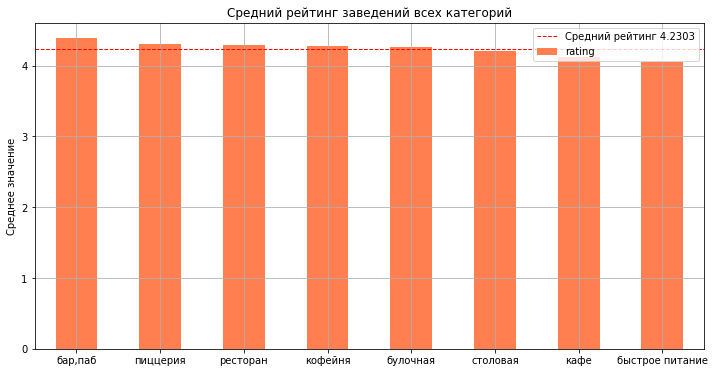

In [42]:
plt.figure(figsize=(12, 6))

df.groupby('category')['rating'].mean().sort_values(ascending = False).plot(
                                         kind = 'bar',
                                         title = 'Средний рейтинг заведений всех категорий',
                                         legend = True,
                                         rot = 0, 
                                         color = 'coral',
                                         xlabel = '',
                                         ylabel = 'Среднее значение')

# Рассчитываем среднее значение рейтинга
mean_churn_share = df['rating'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_churn_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний рейтинг {round(mean_churn_share,4)}')

# Добавляем сетку графика
plt.grid()
plt.legend()

# Выводим график
plt.show()

Усреднённые рейтинги различных типов заведений общественного питания отличаются незначительно — все значения находятся в диапазоне от 4.06 до 4.39. Более высокими рейтингами (около 4.4) выделяются бары, пиццерии и рестораны. В среднем чуть ниже оцениваются столовые, кофейни и булочные (в пределах 4.22–4.28). Наименьшие средние рейтинги у заведений быстрого питания (4.06) и кафе (4.15).

---

### Корреляция рейтингов заведений с другими данными

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений.

In [49]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.199065
district,0.189582
is_24_7,0.161354
chain,0.118926
seats,0.000000


Визуализируем результат корреляции с помощью библиотеки seaborn

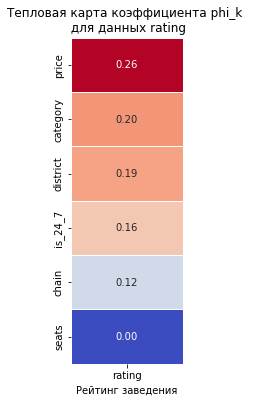

In [51]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

# Выводим график
plt.show()

Не было обнаружено ни одной сильной или умеренной корреляции рейтинга с другими переменными. Тем не менее, отметим, что наиболее сильная корреляция рейтинга была обнаружена с `ценовой категорией — 0.26`. Проверим эту связь.

In [52]:
# Изучим распределение рейтинга заведений в зависимости от их ценовой категории
df.groupby('price')['rating'].mean().sort_values(ascending = False)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float32

Наблюдается разница в рейтингах заведений разных ценовых категорий. Наибольшую среднюю оценку имеют заведения высокой ценовой категории — 4.44, наименьшую — заведения с низкими ценами (4.17%). Заведения с ценами выше среднего и средними в среднем оцениваются в 4.39 и 4.3 балла соответственно. То есть между рейтингом заведения и его ценовой категорией действительно существует прямая связь.

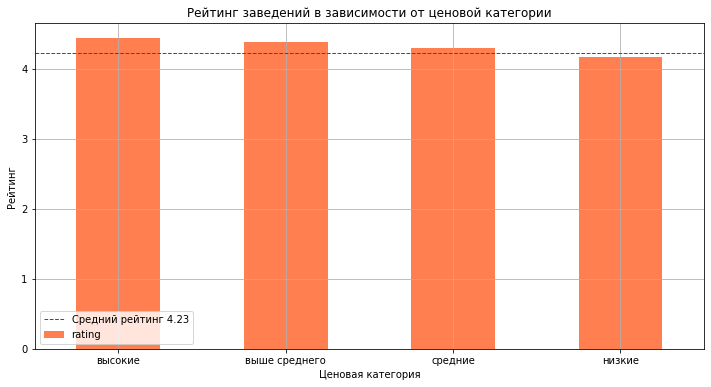

In [51]:
# Построим столбчатую диаграмму для визуализации выявленной разницы
plt.figure(figsize = (12, 6))

df.groupby('price')['rating'].mean().sort_values(ascending = False).plot(
                                    kind = 'bar',
                                    rot = 0,
                                    title = 'Рейтинг заведений в зависимости от ценовой категории',
                                    legend = True,
                                    color = 'coral',
                                    xlabel = 'Ценовая категория',
                                    ylabel = 'Рейтинг')

# Рассчитываем среднее значение рейтинга
mean_churn_share = df['rating'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_churn_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Средний рейтинг {round(mean_churn_share,2)}')

# Добавляем сетку графика
plt.grid()
plt.legend()

plt.show()

Также интересно рассмотреть распределение рейтинга заведений в зависимости от режима работы и района расположения.

In [54]:
# Изучим распределение рейтинга заведений в зависимости от режима работы
df.groupby('is_24_7')['rating'].mean().sort_values(ascending = False)

is_24_7
False    4.245287
True     4.072329
Name: rating, dtype: float32

Заведения, работающие ежедневно и круглосуточно, имеют в среднем более низкие рейтинги (4.26), по сравнению с заведениями, работающими по другому графику (4.07).

In [55]:
# Изучим распределение рейтинга заведений в разных административных районах
df.groupby('district')['rating'].mean().sort_values(ascending = False)

district
Центральный административный округ         4.377520
Северный административный округ            4.243255
Северо-Западный административный округ     4.208802
Южный административный округ               4.184417
Западный административный округ            4.181647
Восточный административный округ           4.174185
Юго-Западный административный округ        4.172920
Северо-Восточный административный округ    4.147977
Юго-Восточный административный округ       4.101120
Name: rating, dtype: float32

Заведения с самым высоким рейтингом сосредоточены преимущественно в Центральном административном округе.

---

### Топ-15 популярных сетей в Москве

Определим топ-15 сетей общественного питания в Москве по популярности и выведем для каждого из них средний рейтинг.

In [82]:
grouped_df = df.groupby(['name', 'category']).agg(
    count_object = ('chain', 'sum'),
    mean_rating = ('rating', 'mean')
).sort_values(by = 'count_object', ascending = False).head(15).reset_index()

grouped_df

,name,category,count_object,mean_rating
0,Шоколадница,кофейня,119,4.178151
1,Домино'с Пицца,пиццерия,76,4.169737
2,Додо Пицца,пиццерия,74,4.286487
3,One Price Coffee,кофейня,71,4.064789
4,Яндекс Лавка,ресторан,69,3.872464
5,Cofix,кофейня,65,4.075385
6,Prime,ресторан,49,4.114285
7,КОФЕПОРТ,кофейня,42,4.147619
8,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
9,Теремок,ресторан,36,4.105556


In [76]:
# Посчитаем средний рейтинг топ-15 популярных сетевых заведений Москвы
round(grouped_df['mean_rating'].mean(), 2)

4.15

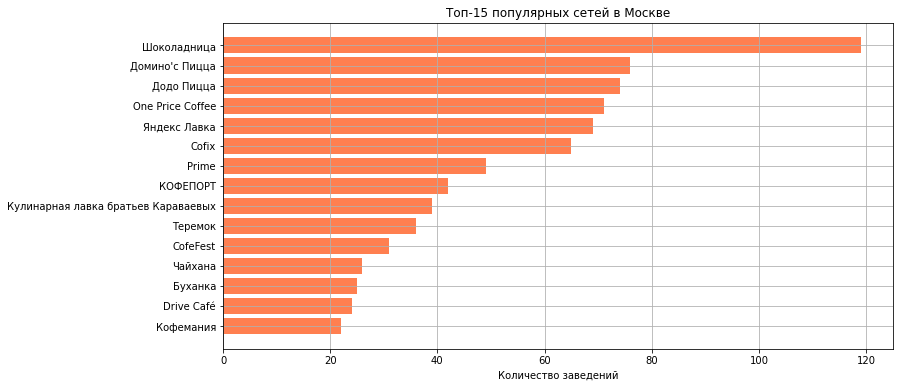

In [83]:
# Построим линейчатую диаграмму для отражения количества заведений
plt.figure(figsize = (12,6))

df_sorted = grouped_df[['name', 'count_object']].sort_values(by = 'count_object', ascending = True)
plt.barh(df_sorted['name'], df_sorted['count_object'], color = 'coral')

# Настраиваем оформление графика
plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Количество заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

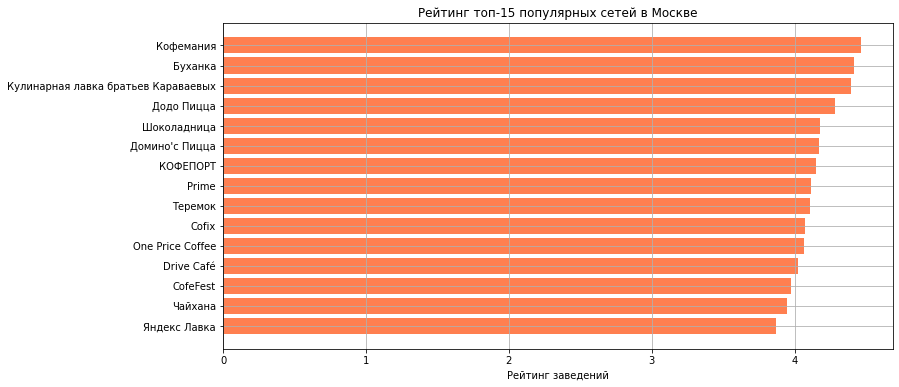

In [86]:
# Построим линейчатую диаграмму для отражения рейтинга заведений
plt.figure(figsize = (12,6))

df_sorted = grouped_df[['name', 'mean_rating']].sort_values(by = 'mean_rating', ascending = True)
plt.barh(df_sorted['name'], df_sorted['mean_rating'], color = 'coral')

# Настраиваем оформление графика
plt.title('Рейтинг топ-15 популярных сетей в Москве')
plt.xlabel('Рейтинг заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Было определено 15 самых популярных сетей общественного питания Москвы. Преимущественно это кофейни, но в топ-3 популярных сетей входят две пиццерии — Домино'с Пицца и Додо Пицца. На первом месте по количеству заведений — Шоколадница, представленная 120 точками в городе.

Средний рейтинг сетей не всегда связан с их популярностью — например, топ-3 по рейтингу занимают такие сети, как «Буханка», «Кулинарная лавка братьев Караваевых», «Хинкальная», количество заведений которых не превышает 39.

---

### Вариация среднего чека заведения в зависимости от района Москвы

- Изучим распределение среднего чека по всем данным

In [65]:
# Изучим данные метода describe по переменной middle_avg_bill
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053650
std       1009.734436
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

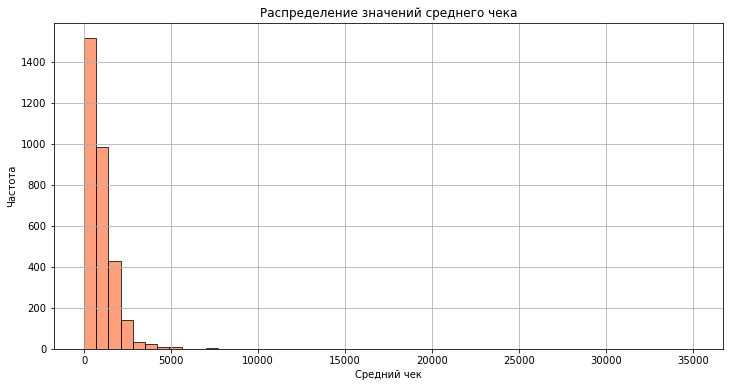

In [87]:
# Построим гистограмму распределения значений и диаграмму размаха для столбца seats
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['middle_avg_bill'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
                color = 'coral'
)

# Настраиваем оформление графика
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

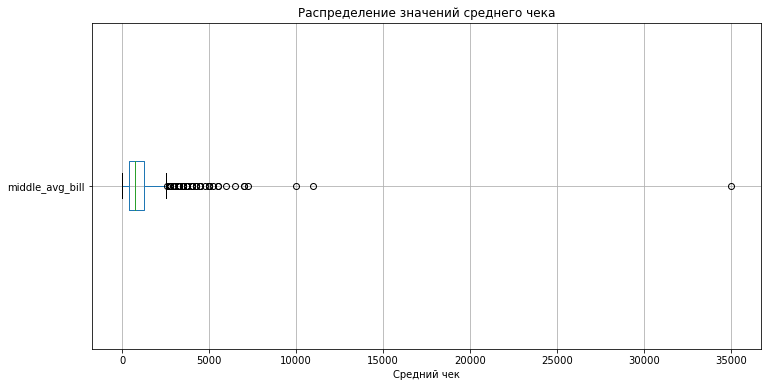

In [67]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

По гистограмме видно, что паспределение значений асимметричное, скошенное вправо. Это демонстрирует и значительная разница между медианой (750) и средним (958). Также высокое значение стандартного отклонения (1010) указывает на большой разброс значений.

Минимальное значение — 0, что, скорее всего, является ошибкой, поскольку средний чек 0 рублей очень маловероятен. Максимальное значение 35000 — вероятно, не является аномалией, поскольку такие суммы возможны для заведений с высоким уровнем цен. При этом основная часть данных сосредоточена между суммами 375 и 1250 рублей. Значения после 2500, согласно гистограмме размаха, являются выбросами, однако эти значения вполне вероятны для дорогих заведений — ресторанов, например.

- Проанализируем значения среднего чека и медианы в разных административных округах Москвы

In [89]:
df.groupby('district')['middle_avg_bill'].agg(['median', 'mean'])

,median,mean
district,,
Восточный административный округ,575.0,820.626953
Западный административный округ,1000.0,1053.225464
Северный административный округ,650.0,927.959656
Северо-Восточный административный округ,500.0,716.611267
Северо-Западный административный округ,700.0,822.222900
Центральный административный округ,1000.0,1191.057495
Юго-Восточный административный округ,450.0,654.097961
Юго-Западный административный округ,600.0,792.561707
Южный административный округ,500.0,834.398071


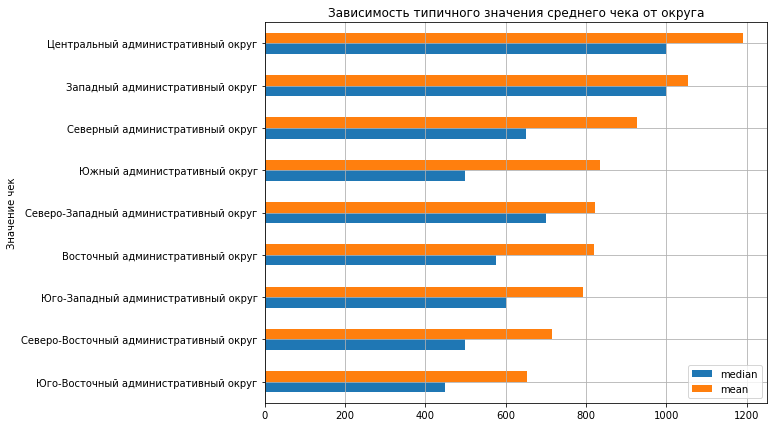

In [100]:
# Построим линейчатую диаграмму по столбцу district
df.groupby('district')['middle_avg_bill'].agg(['median', 'mean']).sort_values(by = 'mean').plot(
                kind = 'barh',
                legend = True,
                title = 'Зависимость типичного значения среднего чека от округа',
                figsize = (9,7),
                xlabel = '',
                ylabel = 'Значение чека'
                )

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Наблюдаются различия между районом расположения заведения и средним чеком. Самый дорогой район — Центральный, в котором средний чек составляет 1191 рубль. Остальные районы демонстрируют более низкие показатели среднего чека — от 654 рублей в Юго-Восточном районе до 1053 рублей в Западном. Поэтому можно сделать вывод о том, что удалённость от центра влияет на цены в заведениях.

---


### Промежуточный вывод

Анализ данных показал, что:
- Наиболее популярными заведениями общественного питания в Москве являются кафе, рестораны, кофейни — на них приходится 70% всех заведений в городе.
- Больше всего заведений общественного питания представлено в Центральном округе Москвы (27%), здесь более популярны рестораны и бары, чем в остальных районах города. Меньше всего заведений общепита находится в Северо-Западном округе — всего 5% от всех заведений города.
- В Москве преобладают несетевые заведения — их доля составляет 62% против 38% сетевых. Однако это распределение неодинаково в разных категориях. Булочные преимущественно работают в формате сетей (61%), бары и столовые, напротив — чаще работают в формате независимых заведений (78% и 72% соответственно). В кофейнях и пиццериях наблюдается сбалансированное распределение — около 50%/50%. В категориях кафе и ресторанов сохраняется общий тренд с преобладанием несетевых заведений (64-67% против 33-36%).
- Количество посадочных мест в заведениях варьируется в зависимости от категории. Больше всего мест характерно для ресторанов, баров и кофеен — 80-86 мест, меньше всего — для булочных и пиццерий — 50-55 мест.
- Рейтинг заведений в целом не сильно зависит от категории, но можно выделить некоторые заметные тенденции: заведения с самым высоким рейтингом (4.3 - 4.4) представляют бары, пиццерии, рестораны, с самым низким — заведения быстрого питания и кафе (4.05 — 4.12). Эту зависимость подтверждает и корреляционный анализ — наиболее сильная связь рейтинга зафиксирована с ценовой категорией заведения: чем выше цены в заведении, тем выше его рейтинг.
-  Самые популярные сети общественного питания В Москве: Шоколадница, Домино'с Пицца и Додо Пицца. При этом в топ-15 сетевых заведений Москвы основная часть представлена кофейнями.
- Самый высокий средний чек в заведениях Москвы зафиксирован в Центральном административном округе (1191 рубль), самый низкий — в Юго-Восточном (654 рубля).

## 4. Итоговый вывод и рекомендации

В ходе исследования были проанализированы данные о 8000 заведений общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные включали общую информацию о заведениях (расположение, рейтинг, режим и формат работы, категория) и информацию о ценовой политике заведения (средний чек, ценовая категория). Акцент исследования был на том, чтобы определить факторы, влияющие на рейтинг заведений, а также найти различия между зведениями разных категорий и разныъ районов Москвы. Были проанализированы такие параметры, как: административный район Москвы, режим работы, формат работы (сетевое или несетевое заведение), количество посадочных мест, средний чек. 

#### Факторы, влияющие на рейтинг заведения
На рейтинг заведения влияет несколько факторов: ценовая категория, категория, режим работы, расположение относительно центра города.

Наиболее высокие рейтинги характерны для следующих заведений:
- Заведения с высокими ценами (4.44) и ценами выше среднего (4.39);
- Бары, пабы (4.39), пиццерии (4.3), рестораны (4.3);
- Заведения, расположенные в Центральном административном округе (они также демонстрируют самый высокий средний чек);
- Заведения, не работающие круглосуточно.

Также стоит отметить, что заведения с наибольшим средним чеком расположены в Центральном районе Москвы.

#### Структура рынка и популярные заведения
- Кафе, рестораны и кофейни составляют основу рынка — на них приходится около 68% всех заведений;
- В Москве доминируют несетевые заведения (61%), но среди некоторых категорий (например, булочных и кофеен) преобладают сети;
- Наиболее популярные сетевые бренды — Шоколадница, Домино'с Пицца, Додо Пицца, а среди топ-15 сетей большинство — кофейни, что указывает на высокий и устойчивый спрос на данный формат.

#### Рекомендации
На основе полученных результатов можно предложить следующие рекомендации:
- Рассмотреть открытие бара, паба, пиццерии или ресторана;
- Позиционироваться в ценовом сегменте «высоком» или «выше среднего»;
- Открыть заведение в Центральном районе;
- Круглосуточные заведения не дают преимуществ в рейтинге, поэтому не стоит ориентироваться на такой режим работы.